In [ ]:
# 2. 数据文件high-speed rail.csv存放着世界各国高速铁路的情况。
# （1）各国运营里程对比柱状图， 标注China为“Longest”
# （2）各国运营里程现状和发展堆叠柱状图
# （3）各国运营里程占比饼图，China扇形
# 【提示】：
# 从文件中读取数据时，使用第一列数据作为index
# data = pd.read_csv(‘High-speed rail.csv’, index_col =‘Country’) ，获取中国对应的数据行，使用data ['China’]离开中心点

In [ ]:
# （1）各国运营里程对比柱状图， 标注China为“Longest”

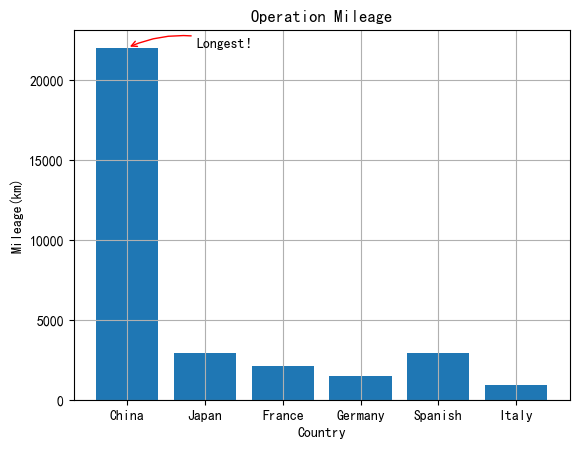

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("High-speed rail.csv", index_col ='Country')
# 只保留需要的三列
selected_columns = data[['Operation', 'Under-construction', 'Planning']]

# 假设当前 DataFrame 名为 df（例如：df = selected_columns）
# 1. 获取索引列（Country）的所有值为列表
country_list = selected_columns.index.tolist()

# 2. 获取 Operation 列的所有值为列表
operation_list = selected_columns['Operation'].tolist()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示为方块的问题
plt.figure()

plt.bar(country_list,operation_list)
plt.title('Operation Mileage')
plt.xlabel('Country')
plt.ylabel('Mileage(km)')

# 找到最高点
max_Mileage = max(operation_list)
max_index = operation_list.index(max_Mileage)
max_Country = country_list[max_index]

# 添加注解
plt.annotate(
    f'Longest！',
    xy=(max_index, max_Mileage),          # 注解位置（x, y）
    xytext=(50, 0),                     # 文字偏移量（单位为像素）
    textcoords='offset points',          # 偏移方式
    arrowprops=dict(arrowstyle='->',    # 箭头样式
                    connectionstyle='arc3,rad=0.2',  # 弧线连接
                    color='red'),       # 箭头颜色
    fontsize=10,
)
plt.grid(True)

In [ ]:
# （2）各国运营里程现状和发展堆叠柱状图

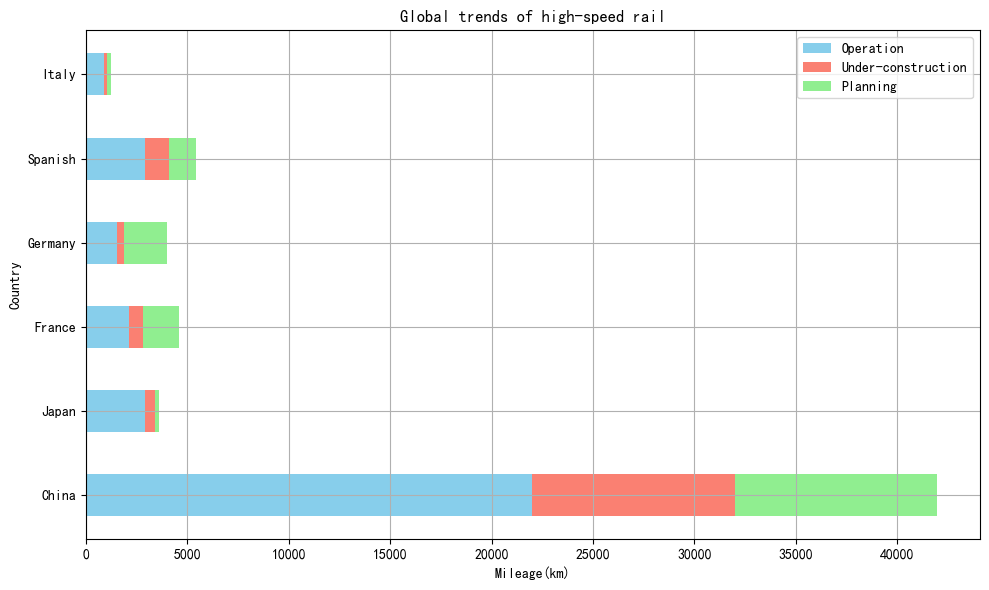

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示为方块的问题
data=pd.read_csv("High-speed rail.csv", index_col ='Country')
# 只保留需要的三列
selected_columns = data[['Operation', 'Under-construction', 'Planning']]
# 1. 获取索引列（Country）的所有值为列表
country_list = selected_columns.index.tolist()
# 2. 获取 Operation 列的所有值为列表
# 获取三列的嵌套列表（每行对应一个国家的三个值）
operation_list = selected_columns[['Operation', 'Under-construction', 'Planning']].values.tolist()


# 提取三列数据
operation = [item[0] for item in operation_list]
under_construction = [item[1] for item in operation_list]
planning = [item[2] for item in operation_list]

# 设置柱状图位置和宽度
y = range(len(country_list))  # y轴位置
height = 0.5  # 柱子宽度

# 创建图表
plt.figure(figsize=(10, 6))

# 绘制堆叠柱状图
plt.barh(y, operation, height, label='Operation',color='skyblue')
plt.barh(y, under_construction, height, left=operation, label='Under-construction',color='salmon')
plt.barh(y, planning, height, left=[sum(pair) for pair in zip(operation, under_construction)], label='Planning' ,color='lightgreen')

# 设置图表标题和轴标签
plt.title('Global trends of high-speed rail')
plt.ylabel('Country')
plt.xlabel('Mileage(km)')
plt.yticks(y, country_list)
plt.legend()

# 显示网格
plt.grid(True)

# 自动调整布局
plt.tight_layout()

# 显示图表
plt.show()


In [ ]:
# （3）各国运营里程占比饼图，China扇形

<Figure size 640x480 with 0 Axes>

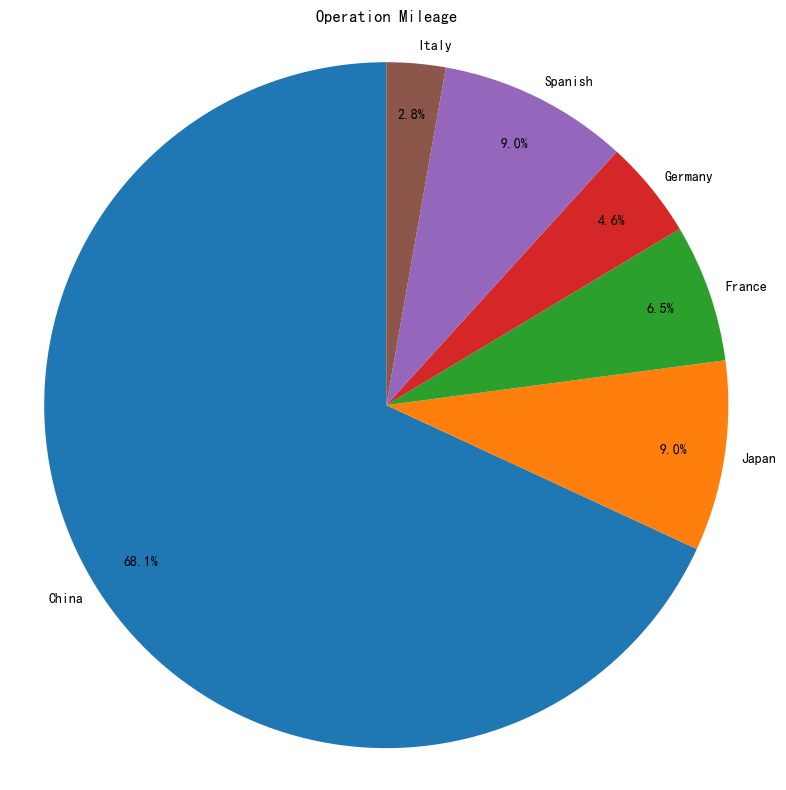

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("High-speed rail.csv", index_col ='Country')
# 只保留需要的三列
selected_columns = data[['Operation', 'Under-construction', 'Planning']]

# 假设当前 DataFrame 名为 df（例如：df = selected_columns）
# 1. 获取索引列（Country）的所有值为列表
country_list = selected_columns.index.tolist()

# 2. 获取 Operation 列的所有值为列表
operation_list = selected_columns['Operation'].tolist()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示为方块的问题
plt.figure()

# 计算运营总里程
total_operation = sum(operation_list)
# 创建饼图
plt.figure(figsize=(8, 8))
plt.pie(
    operation_list,
    labels=country_list,
    autopct='%1.1f%%',     # 显示百分比，保留一位小数
    startangle=90,         # 起始角度
    pctdistance=0.85,      # 百分比标签距离圆心的距离
    labeldistance=1.05,     # 标签距离圆心的距离
    # 移除以下参数，或设置 width=1（默认值）
    # wedgeprops=dict(width=1)  # 默认就是实心饼图，无需设置
)

# 设置标题
plt.title('Operation Mileage')
# 保持饼图为正圆
plt.axis('equal')
# 自动调整布局
plt.tight_layout()
# 显示图表
plt.show()